In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




In [4]:
data_a = pd.read_csv('NivelAnsiedadXCovid.csv', index_col=[0])
data_a.info()
data_a.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 1 to 140
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sexo                  140 non-null    object
 1   NIVEL DE ESCOLARIDAD  140 non-null    object
 2   TURNO                 140 non-null    object
 3   EDO CIVIL             140 non-null    object
 4   CATEGORIA             140 non-null    object
 5   RANGO DE EDAD         140 non-null    object
 6   RANGO DE ANTIGÜEDAD   140 non-null    object
 7   NIVEL DE ANSIEDAD     140 non-null    object
dtypes: object(8)
memory usage: 9.8+ KB


,sexo,NIVEL DE ESCOLARIDAD,TURNO,EDO CIVIL,CATEGORIA,RANGO DE EDAD,RANGO DE ANTIGÜEDAD,NIVEL DE ANSIEDAD
folio id,,,,,,,,
1,femenino,licenciatura,nocturno a,union libre,enf gral,20 a 29,1 a 5,leve
2,femenino,posgrado,matutino,casado,enf esp,40 a 49,16 a 20,minima
3,masculino,posgrado,matutino,soltero,enf esp,30 a 39,11 a 15,leve
4,femenino,licenciatura,matutino,union libre,enf esp,40 a 49,16 a 20,moderada
5,femenino,posgrado,matutino,soltero,enf gral,30 a 39,11 a 15,leve
6,femenino,licenciatura,matutino,soltero,enf gral,20 a 29,1 a 5,moderada
7,femenino,licenciatura,matutino,soltero,enf jefe,40 a 49,16 a 20,leve
8,femenino,licenciatura,matutino,casado,aux enf,30 a 39,6 a 10,moderada
9,femenino,licenciatura,matutino,casado,enf gral,30 a 39,1 a 5,moderada


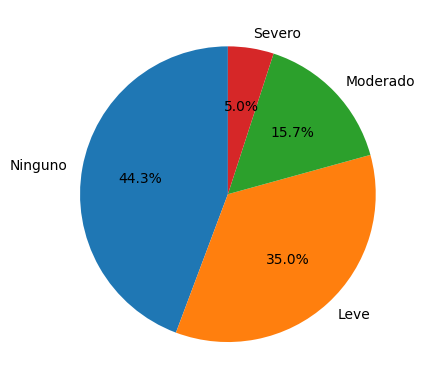

In [5]:
# Obtener los valores y las etiquetas para el gráfico de pastel
values = data_a['NIVEL DE ANSIEDAD'].value_counts()
labels = ['Ninguno', 'Leve', 'Moderado', 'Severo']

# Crear el gráfico de pastel
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


sexo
0    108
1     32
Name: count, dtype: int64


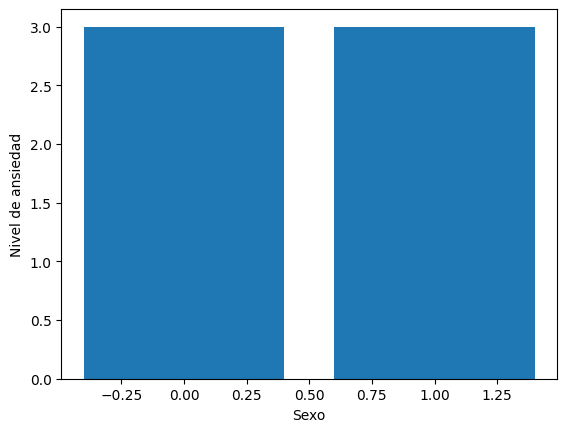

In [46]:
print(data_a['sexo'].value_counts())
plt.bar(data_a['sexo'], data_a['NIVEL DE ANSIEDAD'])
plt.xlabel('Sexo') 
plt.ylabel('Nivel de ansiedad')
plt.show()

TURNO
matutino      52
vespertino    50
nocturno a    20
nocturno b    18
Name: count, dtype: int64


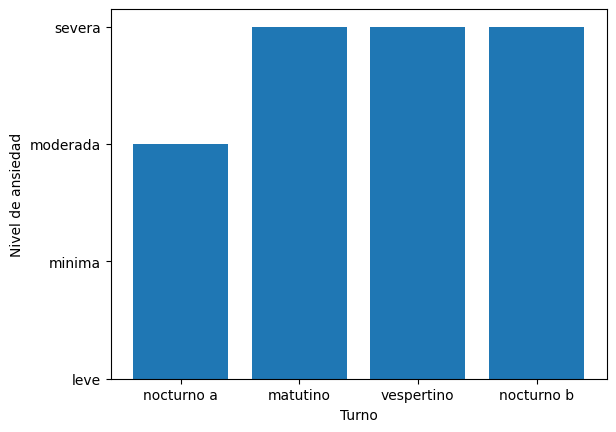

In [6]:
print(data_a['TURNO'].value_counts())
plt.bar(data_a['TURNO'], data_a['NIVEL DE ANSIEDAD'])
plt.xlabel('Turno') 
plt.ylabel('Nivel de ansiedad')
plt.show()

CATEGORIA
enf gral    74
aux enf     54
enf esp      7
enf jefe     5
Name: count, dtype: int64


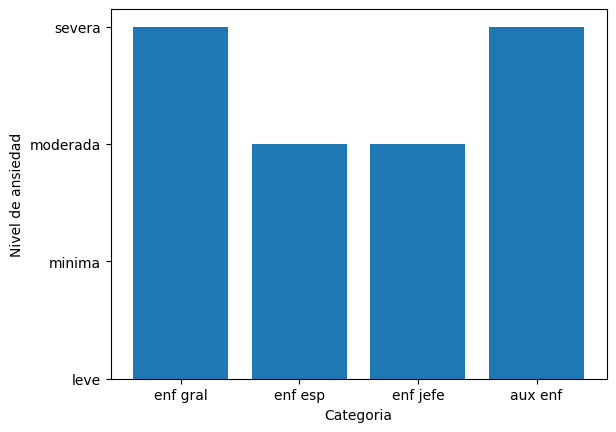

In [7]:
print(data_a['CATEGORIA'].value_counts())
plt.bar(data_a['CATEGORIA'], data_a['NIVEL DE ANSIEDAD'])
plt.xlabel('Categoria') 
plt.ylabel('Nivel de ansiedad')
plt.show()

EDO CIVIL
casado         58
soltero        55
union libre    21
dicorciado      5
viudo           1
Name: count, dtype: int64


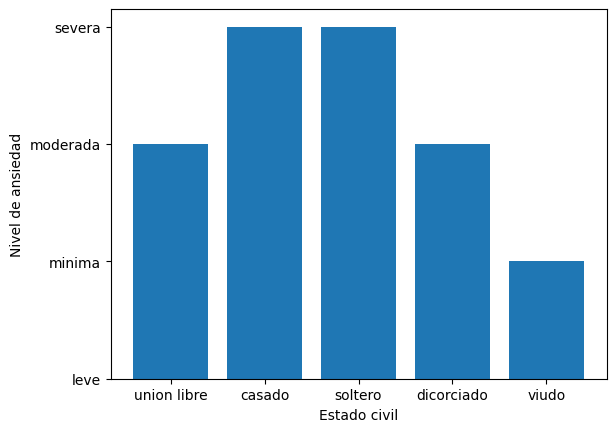

In [8]:
print(data_a['EDO CIVIL'].value_counts())
plt.bar(data_a['EDO CIVIL'], data_a['NIVEL DE ANSIEDAD'])   
plt.xlabel('Estado civil')      
plt.ylabel('Nivel de ansiedad') 
plt.show()

NIVEL DE ESCOLARIDAD
licenciatura     98
nivel tecnico    31
posgrado         11
Name: count, dtype: int64


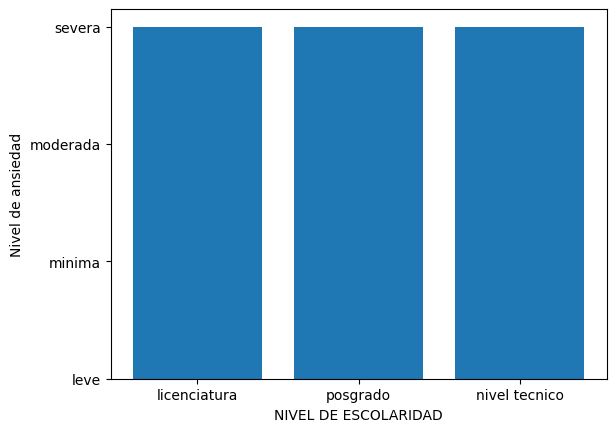

In [9]:
print(data_a['NIVEL DE ESCOLARIDAD'].value_counts())
plt.bar(data_a['NIVEL DE ESCOLARIDAD'], data_a['NIVEL DE ANSIEDAD'])   
plt.xlabel('NIVEL DE ESCOLARIDAD')      
plt.ylabel('Nivel de ansiedad') 
plt.show()

RANGO DE EDAD
30 a 39     66
20 a 29     34
40 a 49     31
50 y mas     9
Name: count, dtype: int64


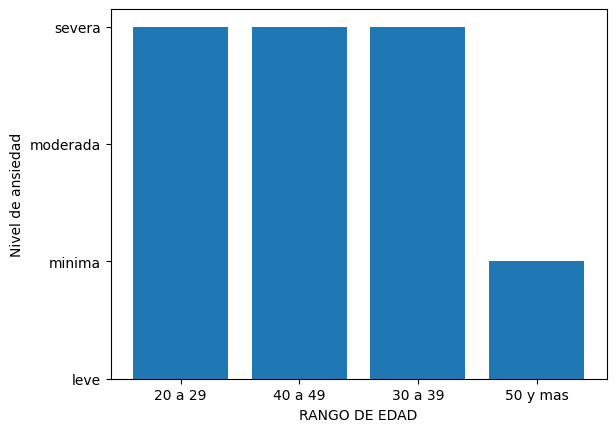

In [10]:
print(data_a['RANGO DE EDAD'].value_counts())
plt.bar(data_a['RANGO DE EDAD'], data_a['NIVEL DE ANSIEDAD'])   
plt.xlabel('RANGO DE EDAD')      
plt.ylabel('Nivel de ansiedad') 
plt.show()


RANGO DE ANTIGÜEDAD
1 a 5       55
6 a 10      37
11 a 15     26
16 a 20     17
21 y mas     5
Name: count, dtype: int64


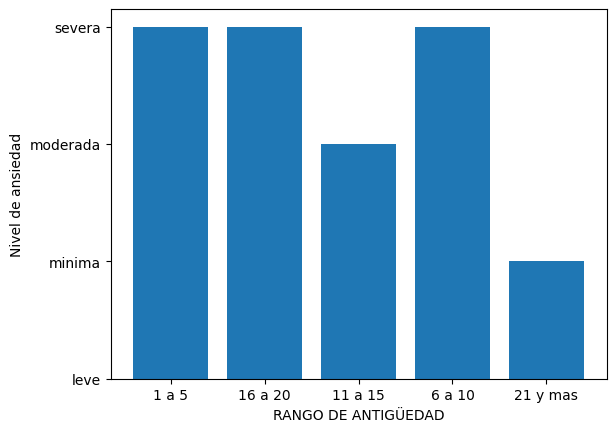

In [11]:
print(data_a['RANGO DE ANTIGÜEDAD'].value_counts())
plt.bar(data_a['RANGO DE ANTIGÜEDAD'], data_a['NIVEL DE ANSIEDAD'])   
plt.xlabel('RANGO DE ANTIGÜEDAD')      
plt.ylabel('Nivel de ansiedad') 
plt.show()

In [12]:
# Crear una instancia de LabelEncoder
coding = LabelEncoder()

# Identificar las columnas categóricas
categorical_cols = data_a.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_cols:
    data_a[col] = coding.fit_transform(data_a[col])

# Mostrar las primeras filas del DataFrame modificado
print(data_a.head(10))
data_a['CATEGORIA'].value_counts()

          sexo  NIVEL DE ESCOLARIDAD  TURNO  EDO CIVIL  CATEGORIA  \
folio id                                                            
1            0                     0      1          3          2   
2            0                     2      0          0          1   
3            1                     2      0          2          1   
4            0                     0      0          3          1   
5            0                     2      0          2          2   
6            0                     0      0          2          2   
7            0                     0      0          2          3   
8            0                     0      0          0          0   
9            0                     0      0          0          2   
10           1                     0      0          2          2   

          RANGO DE EDAD  RANGO DE ANTIGÜEDAD  NIVEL DE ANSIEDAD  
folio id                                                         
1                     0                

CATEGORIA
2    74
0    54
1     7
3     5
Name: count, dtype: int64

In [37]:
dtos = pd.DataFrame(data_a)
X = dtos[['sexo','NIVEL DE ESCOLARIDAD', 'TURNO', 'EDO CIVIL', 'CATEGORIA', 'RANGO DE EDAD', 'RANGO DE ANTIGÜEDAD']]
y = dtos['NIVEL DE ANSIEDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()

In [40]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.34782609 0.34782609 0.36363636 0.40909091 0.5       ]
Mean cross-validation score: 0.3936758893280633


In [41]:
clf = LogisticRegression() 
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
y_pred = clf.predict(X_test_scaled)
print (y_pred[0:5])

[1 1 1 1 1]


In [43]:
label_mapping = {0: 'leve', 1: 'minima', 2: 'moderada', 3: 'severa'}
interpreted_predictions = [label_mapping[label] for label in y_pred[0:5]]
print(interpreted_predictions)

['minima', 'minima', 'minima', 'minima', 'minima']


In [59]:
new_data = pd.DataFrame({'sexo': [1],'NIVEL DE ESCOLARIDAD': [0], 'TURNO': [1], 'EDO CIVIL': [2], 'CATEGORIA': [0], 'RANGO DE EDAD': [0], 'RANGO DE ANTIGÜEDAD': [0]})
new_data_scaled = scaler.transform(new_data)
new_pred = clf.predict(new_data_scaled)
print(new_pred)

[0]


In [60]:
label_mapping = {0: 'leve', 1: 'minima', 2: 'moderada', 3: 'severa'}
interpreted_predictions = [label_mapping[label] for label in new_pred[0:5]]
print(interpreted_predictions)

['leve']
